# Segmenting US cities into cluster based on their similarities - By KK

## Introduction
This Project identifies and segment US Cities which are alike to each other (or similar to each other) using machine learning techniques of unsupervised clustering algorithm  that segments into 5 cluster based on how similar to one another.And then plot this similar clusters into waffle chart to see the US cities distribution based on similarity index. And finally plots all US cities into MAP with circular markers with 5 different colors each showing cluster

**Input**: A CSV file with all cities of USA with its latitude and langititude <br>
**APIs**: FourSquare API to get the venues for each cities <br>
**Algorithm**: K-Mean Clustering <br>
**Output1**: Waffle Chart to see the US City distribution based on similarity <br>
**Output2**: US MAP with cities segmented into 5 cluster based on similarities <br>
        
**Note**: Due to limitation of my Jupyternotebook processing and my access to FourSquare API (number of calls is limited to 2500), I have filtered out cities that are close to each other and keeping unique Cities name by dropping cities with smaller population out of duplicate city names.

## Table of Contents

1. [Data import and Clean up](#0) <br>
2. [Present cleaned-up data (US Cities) on a Map](#1) <br>
3. [Extract Venues using FourSquare API ](#2) <br>
4. [Normalization and One Hot Coding](#3) <br> 
5. [Clustering the US Cities](#4) <br>
6. [Visualization of clustering through Waffle Chart](#5) <br>
7. [Visualization of segmentation through Map](#6) <br>



## 1. Data Import and clean up <a id="0"></a>

**Step 0.** Import libraries

In [130]:
import pandas as pd

**Step 1.** Read CSV file (All Cities with its latitude and longitude) into dataframe

In [131]:
# A. import world cities data into dataframe
world_cities = pd.read_csv('worldcities.csv')
world_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795


**Step 2.** extract US Cities into a separate dataframe and remove irrevelant columns

In [132]:
# B. keep only US cities
us_cities = world_cities[world_cities.country == 'United States']
us_cities.shape


(4864, 11)

In [133]:
# C.drop columns that not revelent to our process
us_cities.drop(['city_ascii','iso2','iso3','admin_name','capital','population'],axis=1,inplace=True)
us_cities.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,city,lat,lng,country,id
8095,Renton,47.4758,-122.1905,United States,1840019827
8096,Chehalis,46.6637,-122.9647,United States,1840018472
8097,Mercer Island,47.5625,-122.2265,United States,1840019830
8098,Lynnwood,47.8285,-122.3034,United States,1840019788
8099,Centralia,46.7226,-122.9695,United States,1840018471


**Step 3.** Remove duplicate City Name and retain one with highest population and also drop cities are close to each other

In [134]:
# sort on City and population
us_cities.sort_values(['city','id'],inplace=True)

# drop duplicate City name , keeping one with highest population
us_cities.drop_duplicates(['city'],keep='last',inplace=True)
us_cities.shape
print(us_cities.head())
#print(us_cities[us_cities['city'] == 'New York'])

           city      lat       lng        country          id
9380  Abbeville  29.9751  -92.1265  United States  1840014005
8217   Aberdeen  46.9757 -123.8095  United States  1840018446
9266    Abilene  32.4543  -99.7384  United States  1840019476
8280   Abingdon  36.7089  -81.9713  United States  1840006529
8829    Absecon  39.4228  -74.4944  United States  1840003797


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [135]:
# E. drop rows with near to each other

#concate rounded lat & lang
us_cities_temp = pd.concat([us_cities,us_cities.lat.round(),us_cities.lng.round()],axis=1, sort=False)

# rename columns
us_cities_temp.columns = ['City', 'lat','lng','country','Population','lat1','lng1']

#sort on rounded lat & lang
us_cities_temp.sort_values(['lat1','lng1'],inplace=True)

# drop duplicate City name , keeping one with highest population
us_cities_temp.drop_duplicates(['lat1','lng1'],keep='last',inplace=True)

usa_cities = us_cities_temp.sort_values(['City'])
usa_cities

,City,lat,lng,country,Population,lat1,lng1
8103,Airway Heights,47.6459,-117.5792,United States,1840018399,48.0,-118.0
10529,Alamosa,37.4755,-105.8770,United States,1840018921,37.0,-106.0
9568,Alliance,42.1025,-102.8765,United States,1840006975,42.0,-103.0
12404,Alpena,45.0740,-83.4399,United States,1840003947,45.0,-83.0
9257,Alpine,30.3640,-103.6650,United States,1840019580,30.0,-104.0
...,...,...,...,...,...,...,...
12533,Zeeland,42.8139,-86.0129,United States,1840000383,43.0,-86.0
8616,Zephyrhills,28.2407,-82.1797,United States,1840015968,28.0,-82.0
12358,Zimmerman,45.4416,-93.5978,United States,1840009993,45.0,-94.0
11063,Zion,42.4598,-87.8509,United States,1840010114,42.0,-88.0


In [136]:
# F. Reset index
usa_cities.reset_index(inplace=True)
usa_cities.shape
print(usa_cities.head())

   index            City      lat       lng        country  Population  lat1  \
0   8103  Airway Heights  47.6459 -117.5792  United States  1840018399  48.0   
1  10529         Alamosa  37.4755 -105.8770  United States  1840018921  37.0   
2   9568        Alliance  42.1025 -102.8765  United States  1840006975  42.0   
3  12404          Alpena  45.0740  -83.4399  United States  1840003947  45.0   
4   9257          Alpine  30.3640 -103.6650  United States  1840019580  30.0   

    lng1  
0 -118.0  
1 -106.0  
2 -103.0  
3  -83.0  
4 -104.0  


In [137]:
# g. Drop first 2 columns
usa_cities.drop(['index','lat1','lng1'],axis=1,inplace=True)
usa_cities.head()

,City,lat,lng,country,Population
0,Airway Heights,47.6459,-117.5792,United States,1840018399
1,Alamosa,37.4755,-105.8770,United States,1840018921
2,Alliance,42.1025,-102.8765,United States,1840006975
3,Alpena,45.0740,-83.4399,United States,1840003947
4,Alpine,30.3640,-103.6650,United States,1840019580


**Step 4.** Review the cleaned data 

In [138]:
# E. Check if any null field
us_cities.isnull().sum()

city       0
lat        0
lng        0
country    0
id         0
dtype: int64

In [139]:
# F. Check Summary of each field
us_cities.describe()

,lat,lng,id
count,3878.000000,3878.000000,3.878000e+03
mean,37.942404,-93.498166,1.840013e+09
std,5.287162,15.227773,7.628142e+03
min,21.329400,-157.846000,1.840000e+09
25%,33.936900,-101.458650,1.840006e+09
50%,38.878650,-88.992600,1.840015e+09
75%,41.607575,-81.816175,1.840020e+09
max,64.835300,-67.987400,1.840038e+09


In [140]:
us_cities.dtypes

city        object
lat        float64
lng        float64
country     object
id           int64
dtype: object

## 2. Show all all US Cities on a Map that are part of this project <a id="1"></a>

In [141]:
import folium
north_america = folium.Map(location=[48, -102], zoom_start=4)

for lat, lng, label in zip(usa_cities.lat, usa_cities.lng, usa_cities.City):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(north_america)

# show map
north_america

## 3. Get the Venues of each cities of US using FourSquare API  <a id="2"></a>

In [142]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests # library to handle requests

In [143]:
#function to recursively call foursquare  and build venue list
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        #results1 = requests.get(url).json()["response"]
        #results1
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [144]:
CLIENT_ID = 'OMAMZVCQBKQKNS0YNC4CGBQKEX51MKNPV0ZW2B5TSYI2UT3S' # your Foursquare ID
CLIENT_SECRET = 'WICCWNNKLO4NMTPMZ1KOBDTOL4NUYMXP1VWP5OKJUVJNWOR5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=10

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

toronto_venues = getNearbyVenues(names=usa_cities['City'],
                                   latitudes=usa_cities['lat'],
                                   longitudes=usa_cities['lng']
                                  )
print ('After fetching venue details for USA area, the dataframe looks like')
toronto_venues

After fetching venue details for USA area, the dataframe looks like


,City,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Airway Heights,47.6459,-117.5792,Orlison Brewing Co.,47.642827,-117.575613,Brewery
1,Airway Heights,47.6459,-117.5792,Pizza Hut,47.643354,-117.574318,Pizza Place
2,Airway Heights,47.6459,-117.5792,Panda Express,47.643324,-117.575702,Chinese Restaurant
3,Airway Heights,47.6459,-117.5792,A&W,47.642523,-117.576516,Fast Food Restaurant
4,Airway Heights,47.6459,-117.5792,Zip's Drive In,47.642418,-117.582866,Fast Food Restaurant
...,...,...,...,...,...,...,...
2771,Zimmerman,45.4416,-93.5978,Les Junc,45.443354,-93.592199,Furniture / Home Store
2772,Zion,42.4598,-87.8509,Taqueria Los Naranjos,42.456470,-87.854166,Mexican Restaurant
2773,Zion,42.4598,-87.8509,Shirl's,42.462771,-87.854230,American Restaurant
2774,Zion,42.4598,-87.8509,Shirl's Drive in of Zion,42.462751,-87.854153,Restaurant


In [145]:
us_venues = pd.DataFrame(toronto_venues)
us_venues

,City,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Airway Heights,47.6459,-117.5792,Orlison Brewing Co.,47.642827,-117.575613,Brewery
1,Airway Heights,47.6459,-117.5792,Pizza Hut,47.643354,-117.574318,Pizza Place
2,Airway Heights,47.6459,-117.5792,Panda Express,47.643324,-117.575702,Chinese Restaurant
3,Airway Heights,47.6459,-117.5792,A&W,47.642523,-117.576516,Fast Food Restaurant
4,Airway Heights,47.6459,-117.5792,Zip's Drive In,47.642418,-117.582866,Fast Food Restaurant
...,...,...,...,...,...,...,...
2771,Zimmerman,45.4416,-93.5978,Les Junc,45.443354,-93.592199,Furniture / Home Store
2772,Zion,42.4598,-87.8509,Taqueria Los Naranjos,42.456470,-87.854166,Mexican Restaurant
2773,Zion,42.4598,-87.8509,Shirl's,42.462771,-87.854230,American Restaurant
2774,Zion,42.4598,-87.8509,Shirl's Drive in of Zion,42.462751,-87.854153,Restaurant


In [146]:
# save a copy of final dataframe to CSV due to limited access to Foursquare , as I can't pull mor ethan 2500 request per day.
us_venues.to_csv('us_venues')

## 4. Normalization and One hot coding <a id="3"></a>

**Step 1.** Perform One hot coding and normalize using mean function

In [147]:
us_venues = pd.read_csv('us_venues1',index_col=None)
us_venues.drop(['Unnamed: 0'],axis=1,inplace=True)

In [148]:
us_onehot =pd.get_dummies(us_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
us_onehot['City'] = us_venues['city'] 
fix_columns = [us_onehot.columns[-1]] + list(us_onehot.columns[:-1])
us_onehot = us_onehot[fix_columns]
us_onehot.head()


,City,ATM,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,...,Water Park,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Airway Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Airway Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Airway Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airway Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Airway Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
#Get the freqquency and occurancey of each venue of teh City
us_cities_group = us_onehot.groupby('City').mean().reset_index()
us_cities_group

,City,ATM,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,...,Water Park,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Airway Heights,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alamosa,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alliance,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alpena,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alpine,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Zebulon,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,Zeeland,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,Zephyrhills,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,Zimmerman,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Clustering the US Cities using its Venues list <a id="4"></a>

**Step 1.** Perform K Mean Clustering with 5 clusters and add the cluster label to us_cities dataframe 

In [150]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [151]:
# set number of clusters
kclusters = 5

us_cities_group_clustering = us_cities_group.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(us_cities_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
labels = kmeans.labels_

In [152]:
#assign the labels to respective city in dataframe
us_cities_group["Clus_Similarity"] = labels
us_cities_group

,City,ATM,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,...,Waterfall,Weight Loss Center,Whisky Bar,Wine Bar,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit,Clus_Similarity
0,Airway Heights,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,Alamosa,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Alliance,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,Alpena,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,Alpine,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Zebulon,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
503,Zeeland,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
504,Zephyrhills,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
505,Zimmerman,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [153]:
# Join US Cities with Cluster similarity label
us_cities_clus = usa_cities.merge(us_cities_group[['City','Clus_Similarity']], on="City", how = 'inner')
us_cities_clus

,City,lat,lng,country,Population,Clus_Similarity
0,Airway Heights,47.6459,-117.5792,United States,1840018399,3
1,Alamosa,37.4755,-105.8770,United States,1840018921,1
2,Alliance,42.1025,-102.8765,United States,1840006975,3
3,Alpena,45.0740,-83.4399,United States,1840003947,3
4,Alpine,30.3640,-103.6650,United States,1840019580,1
...,...,...,...,...,...,...
502,Zebulon,35.8312,-78.3184,United States,1840016201,3
503,Zeeland,42.8139,-86.0129,United States,1840000383,1
504,Zephyrhills,28.2407,-82.1797,United States,1840015968,0
505,Zimmerman,45.4416,-93.5978,United States,1840009993,1


## 6. Create the waffle chart to show distribution of US cities based on Cluster similarities <a id="5"></a>

In [154]:
%matplotlib inline

import numpy as np  # useful for many scientific computing in Python
from PIL import Image # converting images into arrays

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


**Step 0.** Dertmine , How many cities in each Cluster

In [155]:
us_cities_clus_grp = us_cities_clus.groupby('Clus_Similarity').count()['City'].reset_index()
us_cities_clus_grp

,Clus_Similarity,City
0,0,17
1,1,332
2,2,44
3,3,109
4,4,5


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [156]:
total_cluster = sum(us_cities_clus_grp['Clus_Similarity'])
#total_cluster

category_proportions = [(float(value) / total_cluster) for value in us_cities_clus_grp['Clus_Similarity']]
#category_proportions

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (us_cities_clus_grp.index.values[i] , ': ' , str(proportion))

0 :  0.0
1 :  0.1
2 :  0.2
3 :  0.3
4 :  0.4


**Step 2.** The second step is defining the overall size of the `waffle` chart.

In [157]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

In [158]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print ('cluster',us_cities_clus_grp.index.values[i] , 'needs : ' , str(tiles) , 'tiles')

cluster 0 needs :  0 tiles
cluster 1 needs :  40 tiles
cluster 2 needs :  80 tiles
cluster 3 needs :  120 tiles
cluster 4 needs :  160 tiles


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.

In [159]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


**Step 5.** Map the `waffle` chart matrix into a visual.

<Figure size 432x288 with 0 Axes>

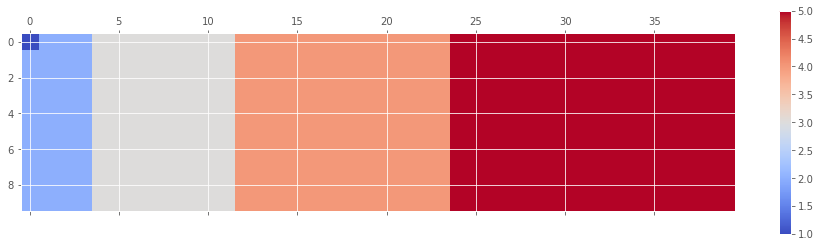

In [160]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Step 6.** Prettify the chart.

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

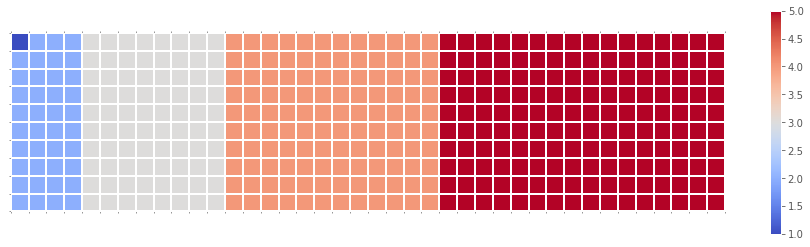

In [161]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Step 7.** Create a legend and add it to chart.

<Figure size 432x288 with 0 Axes>

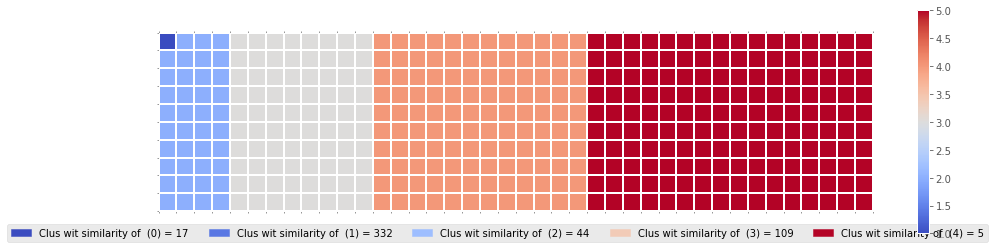

In [162]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(us_cities_clus_grp['Clus_Similarity'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category  in enumerate(us_cities_clus_grp.index.values):
    #label_str = category.astype('U')   + ' (' + str(us_cities_clus_grp['Clus_Similarity'][i]) + ')'
    label_str = 'Clus wit similarity of '   + ' (' + str(us_cities_clus_grp['Clus_Similarity'][i]) + ') = ' + str(us_cities_clus_grp['City'][i])
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(us_cities_clus_grp.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

## 7. Visualization of segmentation through Map <a id="6"></a>

#### Plot the segmented city (by clusters) into map to show the visual representation of cities which are similar to each other

In [163]:
# create map
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

north_america = folium.Map(location=[48, -102], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#FF0000', '#922B21', '#F1C40F', '#ffb360', '##E74C3C']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(us_cities_clus['lat'], us_cities_clus['lng'], us_cities_clus['City'], us_cities_clus['Clus_Similarity']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(north_america)
        #print('color',color)
       
north_america

**Conclusion.** The visualization (post Clustering) using Waffle Chart shows how US Cities are similar to one another and using Map visualization above we can tell which cities is alike to other . the color coding of dots in above maps segments cities based on Similarity